<a href="https://colab.research.google.com/github/sanjanabontha/SKMLI-175-TASKS/blob/main/Phase1(1A_ii).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Epoch 100/1000, Loss: 0.4317
Epoch 200/1000, Loss: 0.4317
Epoch 300/1000, Loss: 0.4317
Epoch 400/1000, Loss: 0.4317
Epoch 500/1000, Loss: 0.4317
Epoch 600/1000, Loss: 0.4317
Epoch 700/1000, Loss: 0.4317
Epoch 800/1000, Loss: 0.4317
Epoch 900/1000, Loss: 0.4317
Epoch 1000/1000, Loss: 0.4317
Accuracy: 0.29
Classification Report:
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        19
  versicolor       0.29      1.00      0.45        13
   virginica       0.00      0.00      0.00        13

    accuracy                           0.29        45
   macro avg       0.10      0.33      0.15        45
weighted avg       0.08      0.29      0.13        45



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


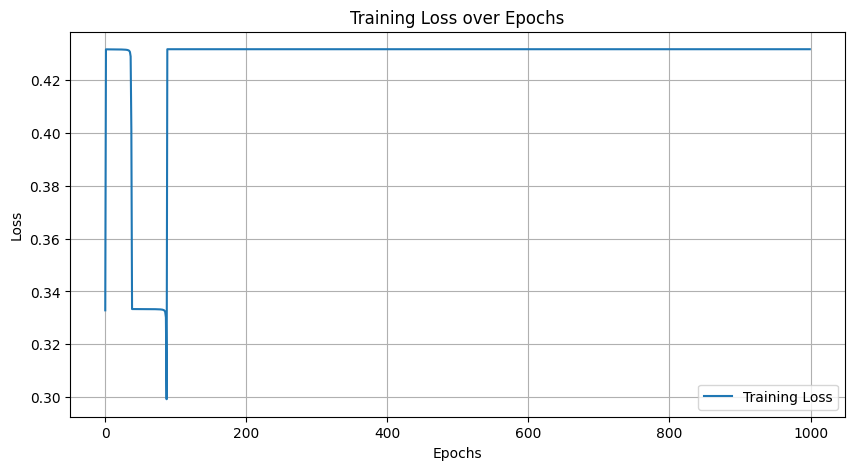

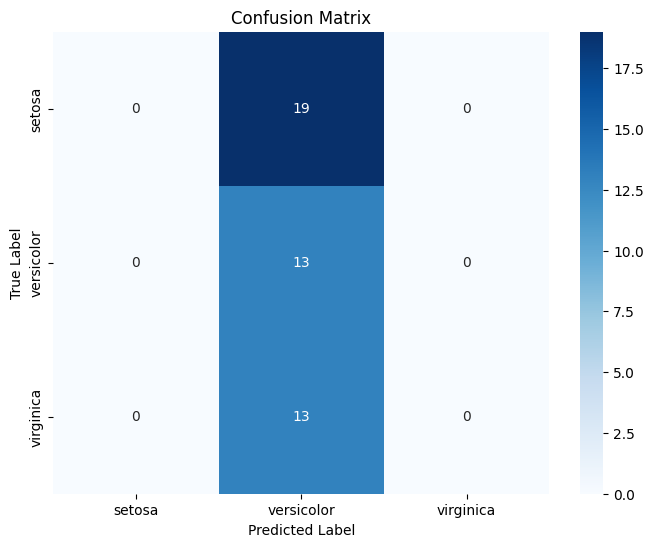

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_hidden = np.random.randn(self.hidden_size)
        self.bias_output = np.random.randn(self.output_size)

    def forward(self, X):
        self.input = X
        self.hidden_input = np.dot(self.input, self.weights_input_hidden) + self.bias_hidden
        self.hidden_output = sigmoid(self.hidden_input)
        self.final_input = np.dot(self.hidden_output, self.weights_hidden_output) + self.bias_output
        self.final_output = sigmoid(self.final_input)
        return self.final_output

    def backward(self, X, y, output):
        self.output_error = y - output
        self.output_delta = self.output_error * sigmoid_derivative(output)

        self.hidden_error = self.output_delta.dot(self.weights_hidden_output.T)
        self.hidden_delta = self.hidden_error * sigmoid_derivative(self.hidden_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_output.T.dot(self.output_delta)
        self.weights_input_hidden += X.T.dot(self.hidden_delta)
        self.bias_output += np.sum(self.output_delta, axis=0)
        self.bias_hidden += np.sum(self.hidden_delta, axis=0)

    def train(self, X, y, epochs=1000):
        self.losses = []  # List to store loss values
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean(np.square(y - output))  # Mean Squared Error
            self.losses.append(loss)
            self.backward(X, y, output)
            if (epoch + 1) % 100 == 0:  # Print every 100 epochs
                print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss:.4f}')

    def predict(self, X):
        return self.forward(X)

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode the labels
onehot_encoder = OneHotEncoder(sparse=False)
y_onehot = onehot_encoder.fit_transform(y.reshape(-1, 1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

# Define the neural network
input_size = X_train.shape[1]
hidden_size = 8  # Number of neurons in the hidden layer
output_size = y_onehot.shape[1]
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Train the neural network
nn.train(X_train, y_train, epochs=1000)

# Make predictions
y_pred = nn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Evaluate the model
accuracy = accuracy_score(y_test_classes, y_pred_classes)
report = classification_report(y_test_classes, y_pred_classes, target_names=iris.target_names)

print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:')
print(report)

# Plot the training loss
plt.figure(figsize=(10, 5))
plt.plot(nn.losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes, labels=range(output_size))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
